<a href="https://colab.research.google.com/github/helenaortizz/TFM/blob/main/Modelo_Predictivo_Parto_Pretermino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TFM: MODELO PREDICTIVO DE PARTO PRETÉRMINO USANDO MACHINE LEARNING**


# PASO 1: **CREACIÓN DEL DATASET**

## 1. Preparación del entorno

### 1.1. Carga de librerías

In [1]:
import pandas as pd

### 1.2. Carga del archivo de datos original

In [2]:
file_path = "/content/drive/MyDrive/Nat2023PublicUS.c20240509.r20240724.txt"

## 2. Creación del nuevo dataset

### 2.1. Selección de variables

In [3]:
# Posiciones de las columnas en el dataset
columns_specs = [
    (78, 79),  # MAGER9 - Edad de la madre (recode 9)
    (106, 107),  # MRACE6 - Raza de la madre (recode 6)
    (123, 124),  # MEDUC - Educación de la madre
    (181, 182),  # TBO_REC - Orden total de nacimientos
    (208, 210),  # ILOP_R11 - Intervalo desde el último embarazo
    (226, 227),  # PRECARE5 - Inicio del cuidado prenatal
    (260, 261),  # CIG0_R - Consumo de cigarrillos antes del embarazo
    (286, 287),  # BMI_R - Índice de Masa Corporal (recode)
    (313, 314),  # RF_GDIAB - Diabetes gestacional
    (315, 316),  # RF_GHYPE - Hipertensión gestacional
    (317, 318),  # RF_PPTERM - Parto prematuro previo
    (330, 331),  # RF_CESAR - Cesárea previa
    (336, 337),  # NO_RISKS - Sin factores de riesgo
    (352, 353),  # NO_INFEC - Sin infecciones reportadas
    (386, 387),  # LD_CHOR - Corioamnionitis
    (400, 401),  # ME_PRES - Presentación fetal en el parto
    (453, 454),  # DPLURAL - Pluralidad (gemelos, trillizos, etc.)
    (493, 494)   # GESTREC3 - Duración de la gestación (recode 3)
    ]

# Nombre de las columnas
column_names = [
    "Mother_Age",
    "Mother_Race",
    "Mother_Education",
    "Total_Birth_Order",
    "Interval_Last_Pregnancy",
    "Prenatal_Care_Start",
    "Smoking_Before_Pregnancy",
    "BMI",
    "Gestational_Diabetes",
    "Gestational_Hypertension",
    "Previous_Preterm_Birth",
    "Previous_Cesarean",
    "No_Risk_Factors",
    "No_Infections",
    "Chorioamnionitis",
    "Fetal_Presentation",
    "Plurality",
    "Gestation_Weeks"
    ]

# Lectura del archivo .txt con las posiciones definidas
df = pd.read_fwf(file_path,
                 colspecs=columns_specs,
                 header=None, names=column_names,
                 dtype=str
                 )

### 2.2. Creación y guardado del nuevo dataset

In [4]:
# Guardado del nuevo dataset en un archivo .CSV
output_file = "/content/parto_pretermino_dataset.csv"
df.to_csv(output_file, index=False)

### 2.3. Dimensiones del dataset nuevo

In [5]:
print(f'El dataset consta de {df.shape[0]} filas y {df.shape[1]} columnas.')

El dataset consta de 3605081 filas y 18 columnas.


# PASO 2: **ANÁLISIS EXPLORATORIO DE LOS DATOS (EDA)**

## 1. Preparación del entorno

### 1.1. Carga de librerías

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### 1.2. Formato

In [7]:
sns.set(style='whitegrid')

### 1.3. Carga del dataset

In [8]:
# Carga del nuevo dataset
file_path = '/content/drive/MyDrive/parto_pretermino_dataset.csv'
df = pd.read_csv(file_path)

# Información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605081 entries, 0 to 3605080
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Mother_Age                int64 
 1   Mother_Race               int64 
 2   Mother_Education          int64 
 3   Total_Birth_Order         int64 
 4   Interval_Last_Pregnancy   int64 
 5   Prenatal_Care_Start       int64 
 6   Smoking_Before_Pregnancy  int64 
 7   BMI                       int64 
 8   Gestational_Diabetes      object
 9   Gestational_Hypertension  object
 10  Previous_Preterm_Birth    object
 11  Previous_Cesarean         object
 12  No_Risk_Factors           int64 
 13  No_Infections             int64 
 14  Chorioamnionitis          object
 15  Fetal_Presentation        int64 
 16  Plurality                 int64 
 17  Gestation_Weeks           int64 
dtypes: int64(13), object(5)
memory usage: 495.1+ MB
None


## 2. Inspección del dataset

### 2.1.

In [9]:
# Visualización de las primeras filas
print(df.head())

# Número de filas y columnas
print(f'El dataset consta de {df.shape[0]} filas y {df.shape[1]} columnas.')

   Mother_Age  Mother_Race  Mother_Education  Total_Birth_Order  \
0           6            3                 7                  3   
1           4            5                 5                  3   
2           3            1                 4                  4   
3           3            1                 5                  4   
4           6            4                 2                  2   

   Interval_Last_Pregnancy  Prenatal_Care_Start  Smoking_Before_Pregnancy  \
0                        8                    1                         0   
1                        2                    1                         0   
2                        2                    1                         0   
3                        2                    1                         0   
4                        5                    1                         0   

   BMI Gestational_Diabetes Gestational_Hypertension Previous_Preterm_Birth  \
0    2                    N                        N   

### 2.2.

In [10]:
# Análisis de valores únicos en variables categóricas
categorical_cols = ['Gestational_Diabetes', 'Gestational_Hypertension',
                    'Previous_Preterm_Birth','Previous_Cesarean',
                    'Chorioamnionitis', 'Mother_Age', 'Mother_Race',
                    'Mother_Education', 'Total_Birth_Order',
                    'Prenatal_Care_Start', 'BMI', 'No_Risk_Factors',
                    'No_Infections', 'Fetal_Presentation',
                    'Plurality', 'Gestation_Weeks']

for col in categorical_cols:
    print(f'\nValores únicos en {col}:')
    print(df[col].value_counts(dropna=False))


Valores únicos en Gestational_Diabetes:
Gestational_Diabetes
N    3301992
Y     297144
U       5945
Name: count, dtype: int64

Valores únicos en Gestational_Hypertension:
Gestational_Hypertension
N    3236823
Y     362313
U       5945
Name: count, dtype: int64

Valores únicos en Previous_Preterm_Birth:
Previous_Preterm_Birth
N    3456630
Y     142506
U       5945
Name: count, dtype: int64

Valores únicos en Previous_Cesarean:
Previous_Cesarean
N    3045864
Y     553272
U       5945
Name: count, dtype: int64

Valores únicos en Chorioamnionitis:
Chorioamnionitis
N    3539254
Y      63617
U       2210
Name: count, dtype: int64

Valores únicos en Mother_Age:
Mother_Age
5    1101031
4     989251
3     618002
6     606309
2     141208
7     136708
8       9556
1       1768
9       1248
Name: count, dtype: int64

Valores únicos en Mother_Race:
Mother_Race
1    2664977
2     555059
4     229548
6     106215
3      35131
5      14151
Name: count, dtype: int64

Valores únicos en Mother_Educatio

### 2.3. Resumen estadístico de las variables

In [11]:
# Resumen de variables numéricas
print(df.describe())

# Resumen de variables categóricas
print(df.describe(include=['object', 'category']))

         Mother_Age   Mother_Race  Mother_Education  Total_Birth_Order  \
count  3.605081e+06  3.605081e+06      3.605081e+06       3.605081e+06   
mean   4.516636e+00  1.527490e+00      4.529594e+00       2.579147e+00   
std    1.198372e+00  1.134518e+00      1.854134e+00       1.694012e+00   
min    1.000000e+00  1.000000e+00      1.000000e+00       1.000000e+00   
25%    4.000000e+00  1.000000e+00      3.000000e+00       1.000000e+00   
50%    5.000000e+00  1.000000e+00      4.000000e+00       2.000000e+00   
75%    5.000000e+00  2.000000e+00      6.000000e+00       3.000000e+00   
max    9.000000e+00  6.000000e+00      9.000000e+00       9.000000e+00   

       Interval_Last_Pregnancy  Prenatal_Care_Start  Smoking_Before_Pregnancy  \
count             3.605081e+06         3.605081e+06              3.605081e+06   
mean              7.248223e+01         1.401277e+00              1.044104e-01   
std               3.388880e+01         8.328000e-01              5.809940e-01   
min      

## 3. Análisis de valores "U"

### 3.1. Análisis de valores "U" por subgrupos

In [12]:
binary_u_cols = ['Gestational_Diabetes', 'Gestational_Hypertension',
                 'Previous_Preterm_Birth', 'Previous_Cesarean', 'Chorioamnionitis']

subgroups = ['Mother_Race', 'Mother_Age', 'BMI']

for var in binary_u_cols:
    df_u = df[df[var] == 'U']

    for subgroup in subgroups:
        print(f"\nDistribución de 'U' por {subgroup}:")
        print(df_u[subgroup].value_counts(normalize=True).sort_index())

        print(f"\nDistribución general por {subgroup}:")
        print(df[subgroup].value_counts(normalize=True).sort_index())


Distribución de 'U' por Mother_Race:
Mother_Race
1    0.727670
2    0.176955
3    0.017157
4    0.047603
5    0.005046
6    0.025568
Name: proportion, dtype: float64

Distribución general por Mother_Race:
Mother_Race
1    0.739228
2    0.153966
3    0.009745
4    0.063673
5    0.003925
6    0.029463
Name: proportion, dtype: float64

Distribución de 'U' por Mother_Age:
Mother_Age
1    0.001009
2    0.051472
3    0.190749
4    0.291505
5    0.262237
6    0.159630
7    0.037511
8    0.004542
9    0.001346
Name: proportion, dtype: float64

Distribución general por Mother_Age:
Mother_Age
1    0.000490
2    0.039169
3    0.171425
4    0.274405
5    0.305411
6    0.168182
7    0.037921
8    0.002651
9    0.000346
Name: proportion, dtype: float64

Distribución de 'U' por BMI:
BMI
1    0.030109
2    0.320774
3    0.197140
4    0.099411
5    0.046594
6    0.027923
9    0.278049
Name: proportion, dtype: float64

Distribución general por BMI:
BMI
1    0.026148
2    0.367302
3    0.271004
4    0.1

### 3.2. Ajuste de valores

In [13]:
# Variables con posibles valores 'U'
binary_u_cols = ['Gestational_Diabetes', 'Gestational_Hypertension',
                 'Previous_Preterm_Birth', 'Previous_Cesarean',
                 'Chorioamnionitis']

# Eliminar filas con al menos un 'U' en esas columnas
df = df[~df[binary_u_cols].isin(['U']).any(axis=1)]

# Verificar tamaño final
print(f"Tamaño tras eliminar 'U': {df.shape}")

Tamaño tras eliminar 'U': (3597883, 18)


## 4. Conversión de variables

### 4.1. Variables categóricas

In [14]:
# Definición de mapeos para variables categóricas
age_mapping = {1: '<15', 2: '15-19', 3: '20-24', 4: '25-29', 5: '30-34',
               6: '35-39', 7: '40-44', 8: '45-49', 9: '50-54'}

race_mapping = {1: 'White', 2: 'Black', 3: 'AIAN', 4: 'Asian', 5: 'NHOPI', 6: 'Multiracial'}

education_mapping = {1: '≤8th', 2: '9-12_no_diploma', 3: 'HS_diploma',
                     4: 'Some_college', 5: 'Assoc_degree', 6: 'Bachelor',
                     7: 'Master', 8: 'Doctorate', 9: 'Unknown'}

bmi_mapping = {1: 'Underweight', 2: 'Normal', 3: 'Overweight',
               4: 'Obesity_I', 5: 'Obesity_II', 6: 'Extreme_Obesity', 9: 'Unknown'}

binary_mapping = {'Y': 1, 'N': 0}

# Aplicación de las conversiones
df['Mother_Age'] = df['Mother_Age'].map(age_mapping)
df['Mother_Race'] = df['Mother_Race'].map(race_mapping)
df['Mother_Education'] = df['Mother_Education'].map(education_mapping)
df['BMI'] = df['BMI'].map(bmi_mapping)

<ipython-input-14-f2dbbd930da8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mother_Age'] = df['Mother_Age'].map(age_mapping)
<ipython-input-14-f2dbbd930da8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mother_Race'] = df['Mother_Race'].map(race_mapping)


### 4.2. Variables binarias

In [15]:
# Conversión en variables binarias de cara a entrenar el modelo de ML
binary_cols = ['Gestational_Diabetes', 'Gestational_Hypertension',
               'Previous_Preterm_Birth', 'Previous_Cesarean', 'Chorioamnionitis']
for col in binary_cols:
    df[col] = df[col].map(binary_mapping)

# Conversión a category para mayor eficiencia
# Convertir todo lo categórico a dtype category
categorical_cols = ['Mother_Age', 'Mother_Race', 'Mother_Education', 'BMI',
                    'Total_Birth_Order', 'Prenatal_Care_Start',
                    'No_Risk_Factors', 'No_Infections',
                    'Fetal_Presentation', 'Plurality', 'Gestation_Weeks'] + binary_cols

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Eliminar filas con demasiados nulos
df_clean = df.dropna(thresh=len(df.columns) - 2)

### 4.3. Visualización de cambios tras los mapeos

In [16]:
# Verificación de los cambios
print('\nDatos post conversión:')
print(df.head())
print(df.dtypes)


Datos post conversión:
  Mother_Age Mother_Race Mother_Education Total_Birth_Order  \
0      35-39        AIAN           Master                 3   
1      25-29       NHOPI     Assoc_degree                 3   
2      20-24       White     Some_college                 4   
3      20-24       White     Assoc_degree                 4   
4      35-39       Asian  9-12_no_diploma                 2   

   Interval_Last_Pregnancy Prenatal_Care_Start  Smoking_Before_Pregnancy  \
0                        8                   1                         0   
1                        2                   1                         0   
2                        2                   1                         0   
3                        2                   1                         0   
4                        5                   1                         0   

         BMI Gestational_Diabetes Gestational_Hypertension  \
0     Normal                    0                        0   
1  Obesity_I    

## 5. Manejo de valores nulos

### 5.1. Visualización de valores nulos

In [17]:
# Visualización de valores nulos por columna
missing_values = df.isnull().sum()
print('\nValores nulos por columna:')
print(missing_values)


Valores nulos por columna:
Mother_Age                  0
Mother_Race                 0
Mother_Education            0
Total_Birth_Order           0
Interval_Last_Pregnancy     0
Prenatal_Care_Start         0
Smoking_Before_Pregnancy    0
BMI                         0
Gestational_Diabetes        0
Gestational_Hypertension    0
Previous_Preterm_Birth      0
Previous_Cesarean           0
No_Risk_Factors             0
No_Infections               0
Chorioamnionitis            0
Fetal_Presentation          0
Plurality                   0
Gestation_Weeks             0
dtype: int64


### 5.2. Eliminación de filas

In [18]:
# Eliminación de filas con más de 1 valor nulo (si quedan)
df_clean = df.dropna(thresh=df.shape[1] - 1)

### 5.3. Visualización tras limpieza

In [19]:
# Verificar limpieza
print(f"\nTamaño después de eliminar nulos: {df_clean.shape}")
print("Valores nulos restantes:\n", df_clean.isnull().sum()[df_clean.isnull().sum() > 0])


Tamaño después de eliminar nulos: (3597883, 18)
Valores nulos restantes:
 Series([], dtype: int64)


## 6. Definición de la variable objetivo

In [20]:
# Conversión de la la variable objetivo
gestation_mapping = {1: 1, 2: 0, 3: None}
df_clean['Gestation_Weeks'] = df_clean['Gestation_Weeks'].map(gestation_mapping)

# Eliminación de filas con valor desconocido si existen
df_clean = df_clean.dropna(subset=['Gestation_Weeks'])

# Verificación de la distribución de la variable objetivo
print('\nDistribución de la variable objetivo:')
print(df_clean['Gestation_Weeks'].value_counts(normalize=True))


Distribución de la variable objetivo:
Gestation_Weeks
0.0    0.877756
1.0    0.122244
Name: proportion, dtype: float64


## 7. Distribución de las variables

### 7.1. Variables categóricas

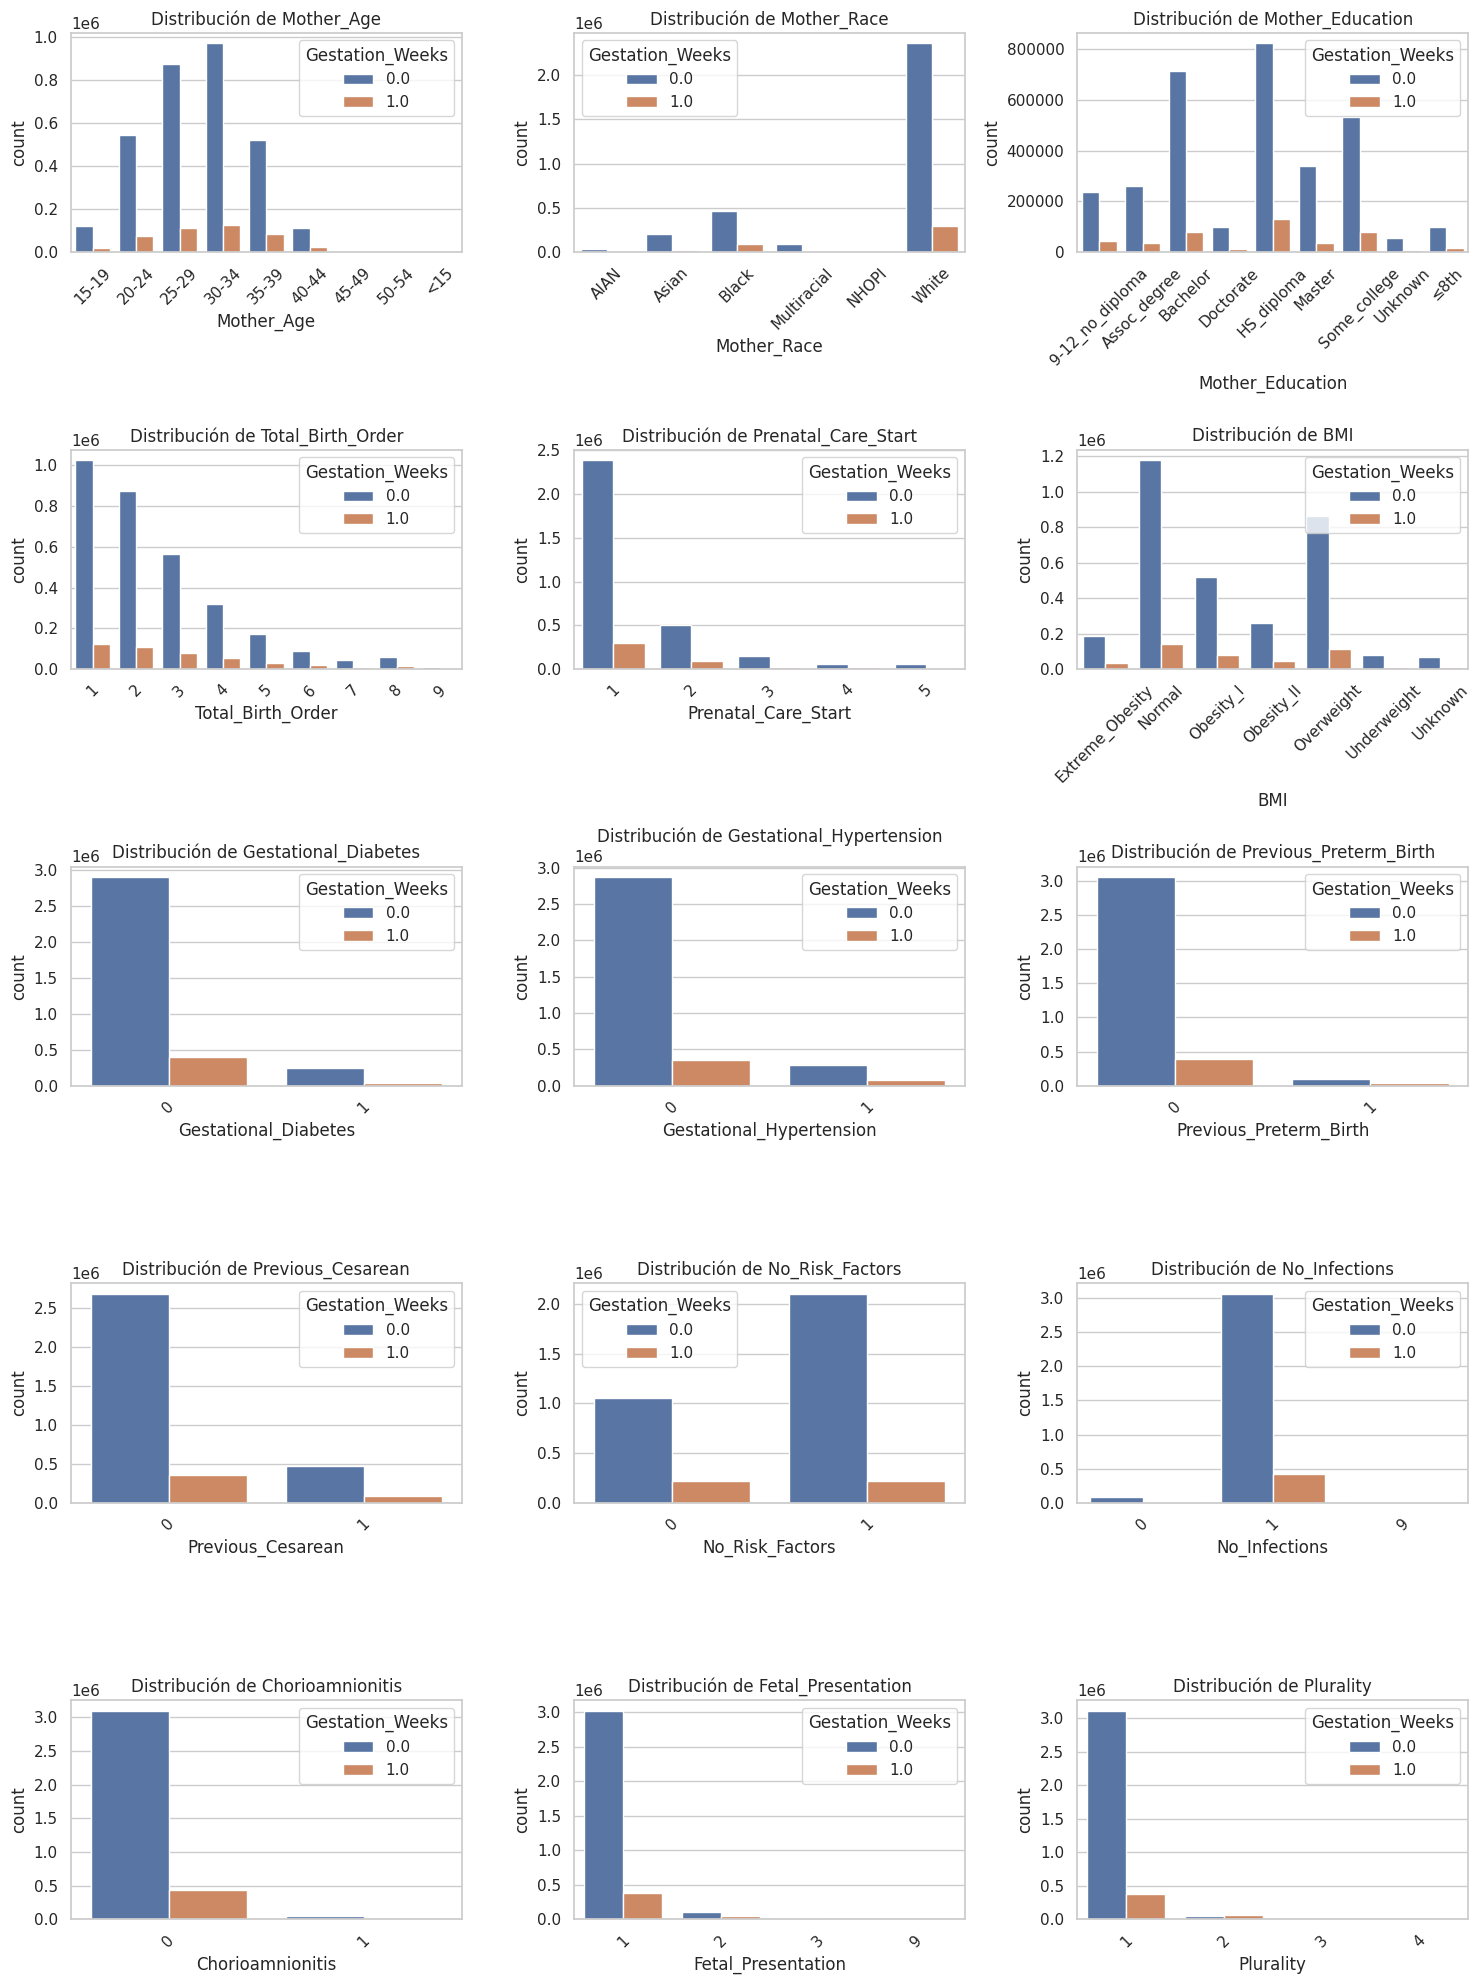

In [21]:
# Visualización de la distribución de las variables categóricas
categorical_cols = df_clean.select_dtypes(include=['category']).columns
num_cols = len(categorical_cols)
rows = (num_cols // 3) + (num_cols % 3 > 0)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=col, data=df_clean, hue='Gestation_Weeks')
    plt.xticks(rotation=45)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

### 7.2. Variables numéricas

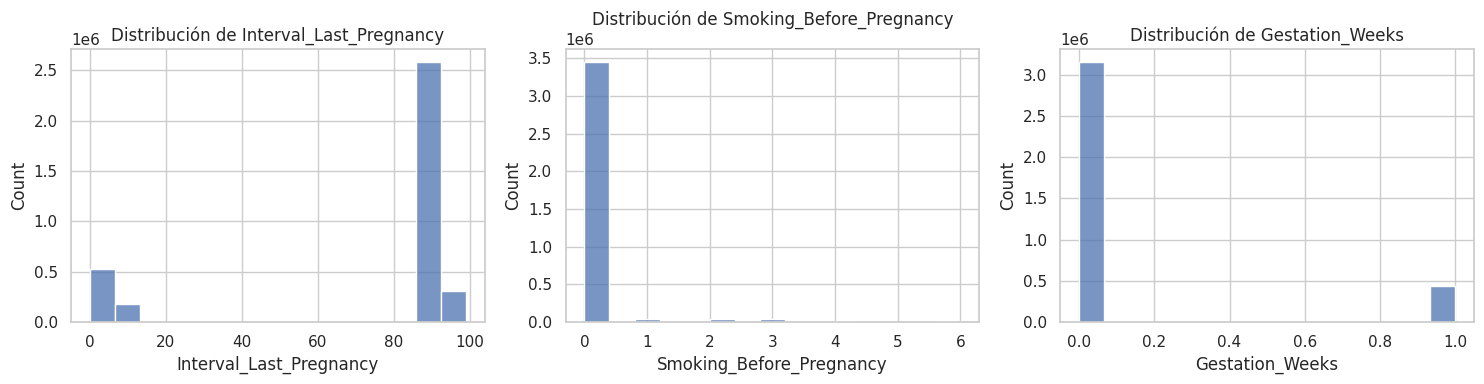

In [22]:
# Visualización de la distribución para variables numéricas
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_cols)
rows = (num_cols // 3) + (num_cols % 3 > 0)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df_clean[col].dropna(), bins=15)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

## 8. Análisis de correlaciones

### 8.1. Correlación entre variables numéricas (Coeficiente de Pearson)

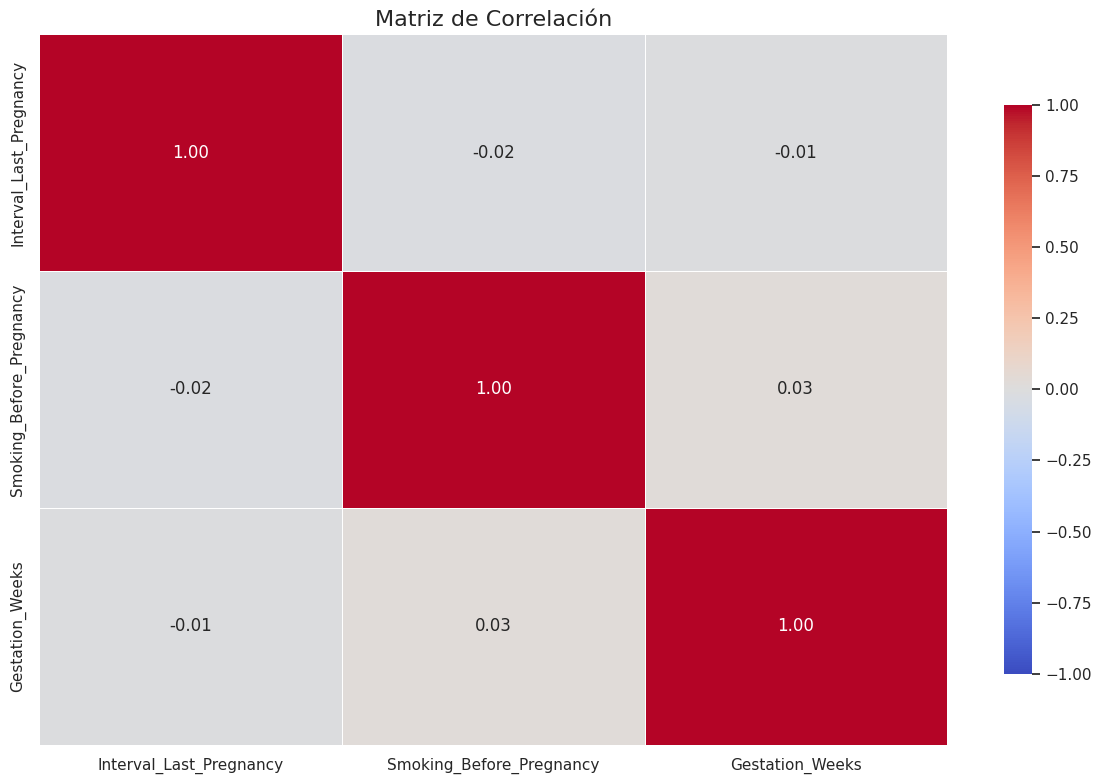

In [23]:
# Matriz de correlación
corr_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1,
            vmax=1, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación', fontsize=16)
plt.tight_layout()
plt.show()

### 8.2. Correlación entre variables categóricas (V de Cramer)

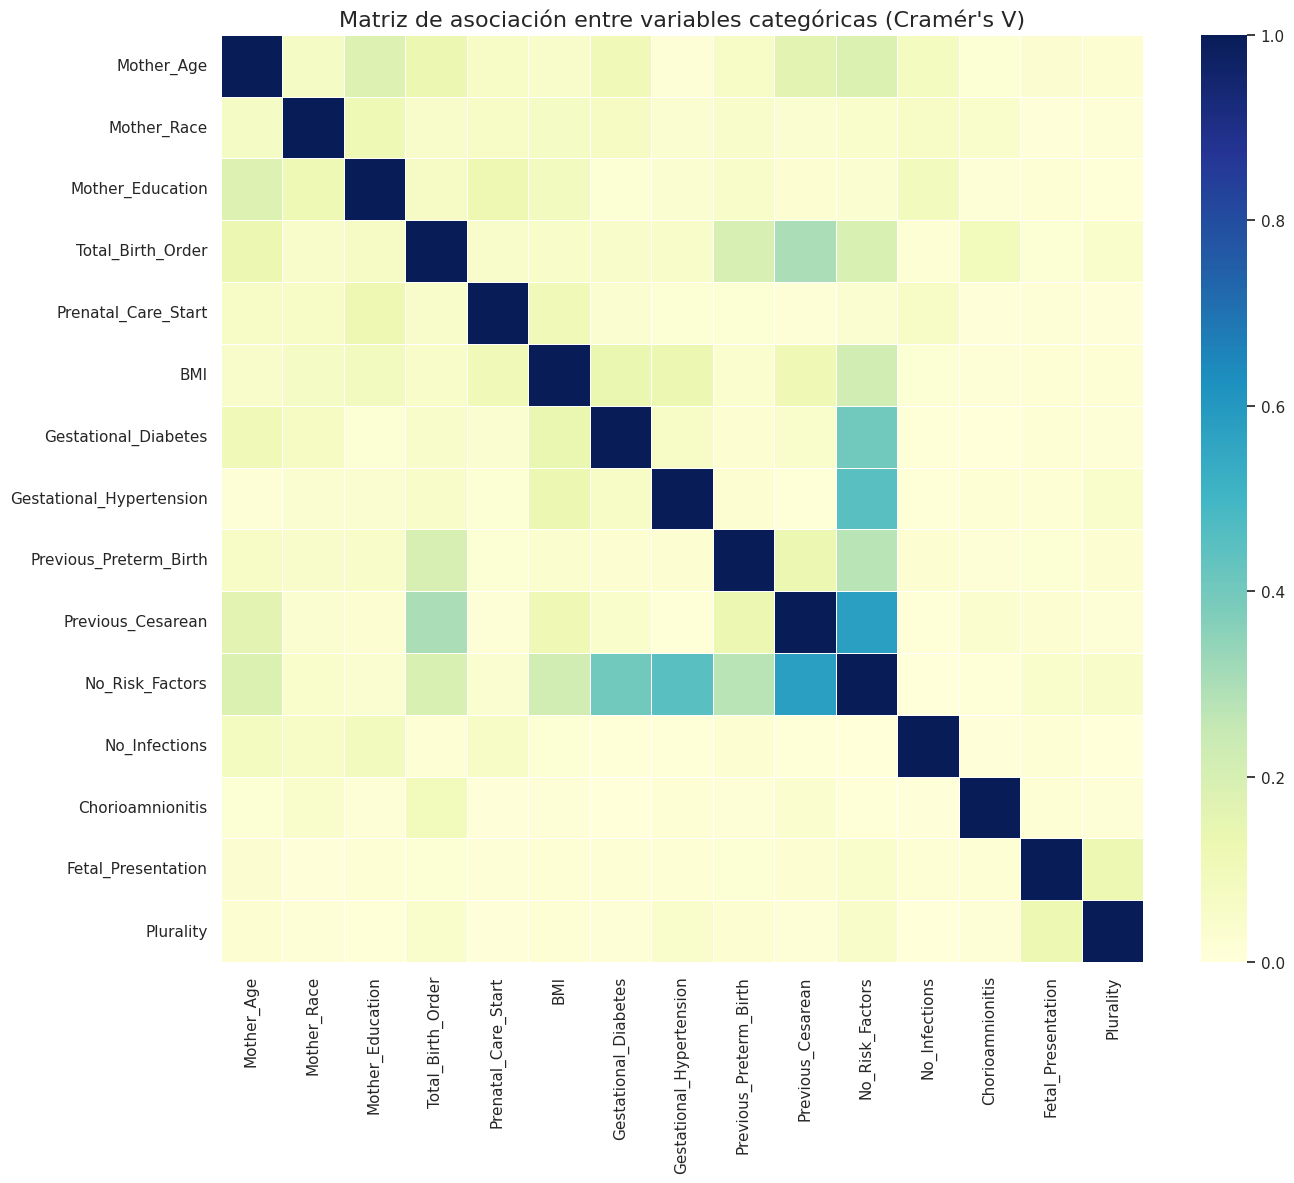

In [24]:
# Definición de la función para calcular la V de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Selección de variables categóricas
cat_cols = df_clean.select_dtypes(include='category').columns.tolist()

# Matriz de V de Cramer
cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            cramer_matrix.loc[col1, col2] = cramers_v(df_clean[col1], df_clean[col2])

cramer_matrix = cramer_matrix.astype(float)

# Visualización
plt.figure(figsize=(14, 12))
sns.heatmap(cramer_matrix, annot=False, cmap="YlGnBu", vmin=0, vmax=1, linewidths=0.5)
plt.title("Matriz de asociación entre variables categóricas (Cramér's V)", fontsize=16)
plt.tight_layout()
plt.show()

### 8.3. Correlación entre variables categóricas y numéricas (ANOVA)

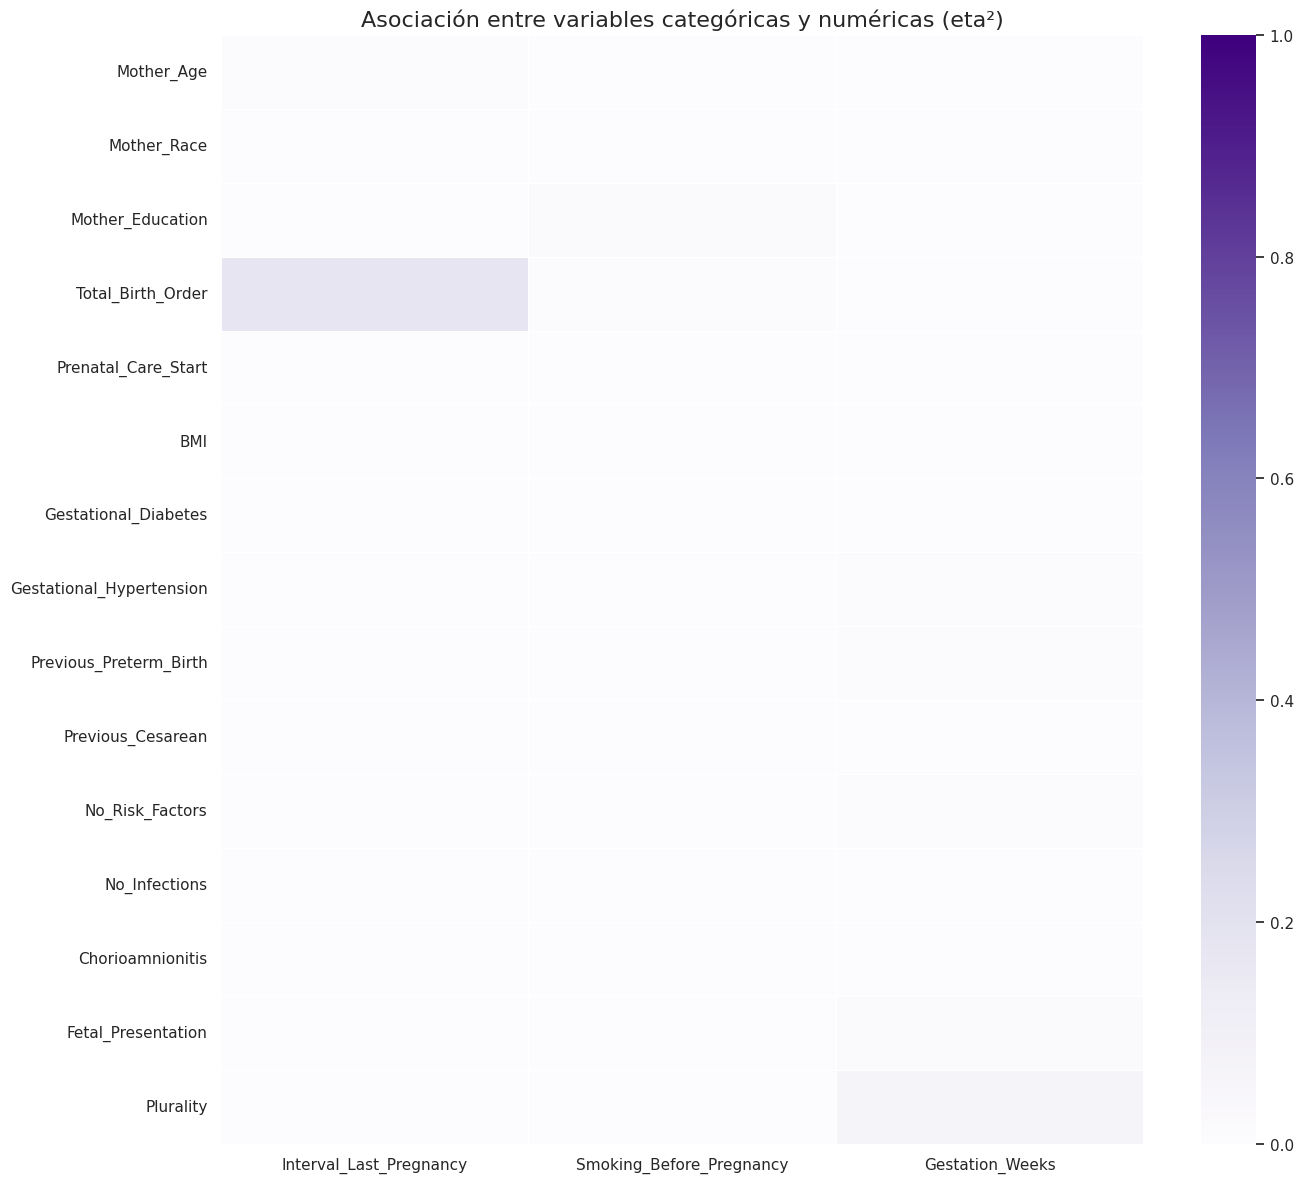

In [25]:
# Función para calcular eta²
def eta_squared(categorical, numerical):
    categories = df_clean[categorical].dropna().unique()
    means = []
    counts = []

    for cat in categories:
        group = df_clean[df_clean[categorical] == cat][numerical].dropna()
        means.append(group.mean())
        counts.append(len(group))

    overall_mean = df_clean[numerical].dropna().mean()
    ss_between = sum(counts[i] * (means[i] - overall_mean)**2 for i in range(len(categories)))
    ss_total = sum((x - overall_mean)**2 for x in df_clean[numerical].dropna())

    return ss_between / ss_total if ss_total != 0 else np.nan

# Lista de variables categóricas y numéricas
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df_clean.select_dtypes(include='category').columns.tolist()

# Cálculo de eta²
eta2_matrix = pd.DataFrame(index=cat_cols, columns=numeric_cols)

for cat in cat_cols:
    for num in numeric_cols:
        eta2_matrix.loc[cat, num] = eta_squared(cat, num)

eta2_matrix = eta2_matrix.astype(float)

# Visualización
plt.figure(figsize=(14, 12))
sns.heatmap(eta2_matrix, annot=False, cmap="Purples", vmin=0, vmax=1, linewidths=0.5)
plt.title("Asociación entre variables categóricas y numéricas (eta²)", fontsize=16)
plt.tight_layout()
plt.show()

# PASO 3: **CREACIÓN DEL MODELO PREDICTIVO**

In [26]:
# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Preprocesamiento
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# División y validación de datos
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
)

# Clasificadores
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

# Métricas
from sklearn.metrics import (
    recall_score, make_scorer, classification_report,
    confusion_matrix, roc_auc_score, roc_curve, auc
)

# Manejo de clases desbalanceadas
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Guardado de modelos
import joblib

## 2. División del dataset y preprocesamiento

### 2.1. División en train y test

Estratificada para respetar la proporción de clases

In [27]:
# Separación var objetivo
X = df_clean.drop(columns=['Gestation_Weeks'])
y = df_clean['Gestation_Weeks']

# División en train/test (estratificada para respetar proporción de clases)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Identificación de columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

### 2.2. Visualización

In [28]:
print("Columnas categóricas:", categorical_cols)
print("Columnas numéricas:", numeric_cols)

Columnas categóricas: ['Mother_Age', 'Mother_Race', 'Mother_Education', 'Total_Birth_Order', 'Prenatal_Care_Start', 'BMI', 'Gestational_Diabetes', 'Gestational_Hypertension', 'Previous_Preterm_Birth', 'Previous_Cesarean', 'No_Risk_Factors', 'No_Infections', 'Chorioamnionitis', 'Fetal_Presentation', 'Plurality']
Columnas numéricas: ['Interval_Last_Pregnancy', 'Smoking_Before_Pregnancy']


### 2.3. Preprocesamiento de los datos

In [29]:
# Preprocesamiento para columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Si quedan NaNs
    ('scaler', StandardScaler())
])

# Preprocesamiento para columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combinación de ambos
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

### 2.4. Función para evaluar los modelos

In [30]:
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo="Modelo"):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    print(f"\n== Evaluación de {nombre_modelo} en test ==")
    print(classification_report(y_test, y_pred, digits=4))
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre_modelo}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre_modelo} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("Tasa de falsos positivos")
    plt.ylabel("Tasa de verdaderos positivos")
    plt.title(f"Curva ROC - {nombre_modelo}")
    plt.legend()
    plt.show()

## 3. Modelos predictivos

## 3.1. Regresión Logística

Recall en validación cruzada (5 folds): 0.5474

== Evaluación de Regresión Logística en test ==
              precision    recall  f1-score   support

         0.0     0.9232    0.7568    0.8318    631297
         1.0     0.2389    0.5480    0.3327     87920

    accuracy                         0.7313    719217
   macro avg     0.5810    0.6524    0.5822    719217
weighted avg     0.8396    0.7313    0.7708    719217

ROC AUC: 0.7081


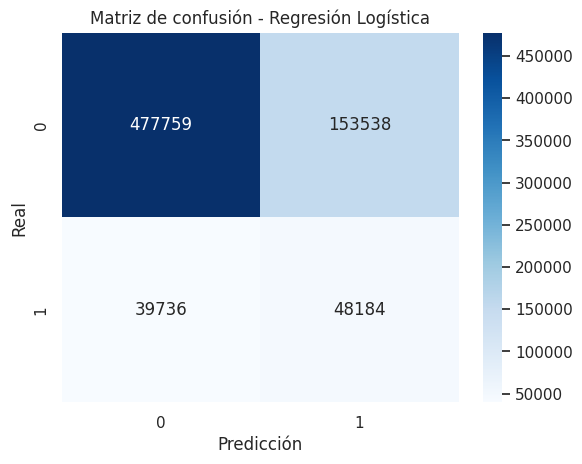

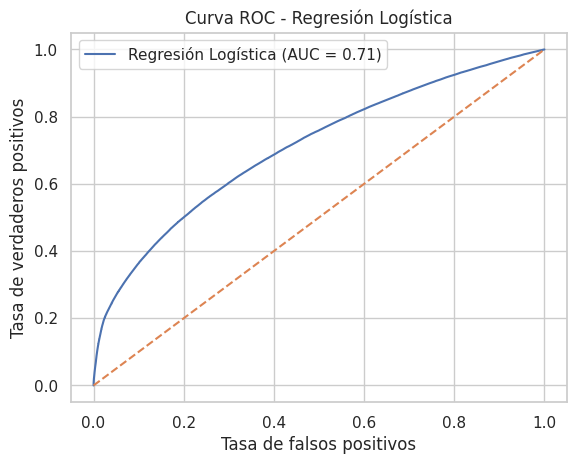

In [31]:
# Creacion del pipeline completo: preprocesamiento + modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

# Definición de la métrica de evaluación (recall)
recall = make_scorer(recall_score)

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluación
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=cv, scoring=recall)

print(f"Recall en validación cruzada (5 folds): {cv_scores.mean():.4f}")

# Entrenamiento completo y evaluación en test
model_pipeline.fit(X_train, y_train)
evaluar_modelo(model_pipeline, X_test, y_test, "Regresión Logística")

#### 3.1.1. Aplicación de Undersampling

In [32]:
# Antes de hacer undersampling, combinación X_train e y_train
rus = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Comprobación de la nueva distribución de clases
print("Distribución tras undersampling:")
print(y_train_under.value_counts())

Distribución tras undersampling:
Gestation_Weeks
0.0    351681
1.0    351681
Name: count, dtype: int64


In [33]:
# Entrenamiento del pipeline completo con los datos submuestreados
cv_scores_under = cross_val_score(model_pipeline, X_train_under, y_train_under, cv=cv, scoring=recall)

print(f"Recall tras undersampling (media de 5 folds): {cv_scores_under.mean():.4f}")

Recall tras undersampling (media de 5 folds): 0.5474


##3.2. XG-Boost

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parámetros (XGBoost): {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 7.180325351668131}
Mejor recall CV (XGBoost): 0.5621

== Evaluación de XGBoost en test ==
              precision    recall  f1-score   support

         0.0     0.9248    0.7462    0.8260    631297
         1.0     0.2364    0.5642    0.3332     87920

    accuracy                         0.7240    719217
   macro avg     0.5806    0.6552    0.5796    719217
weighted avg     0.8406    0.7240    0.7657    719217

ROC AUC: 0.7119


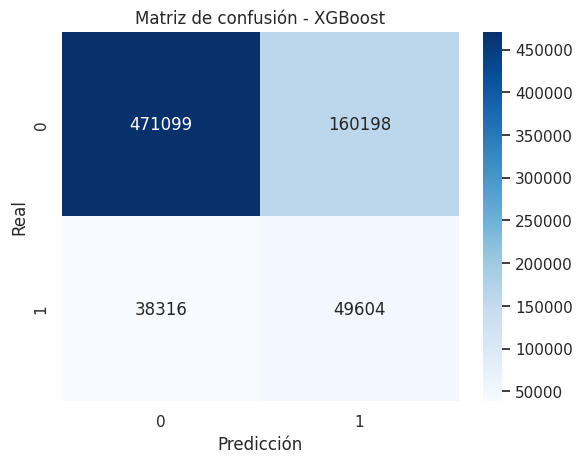

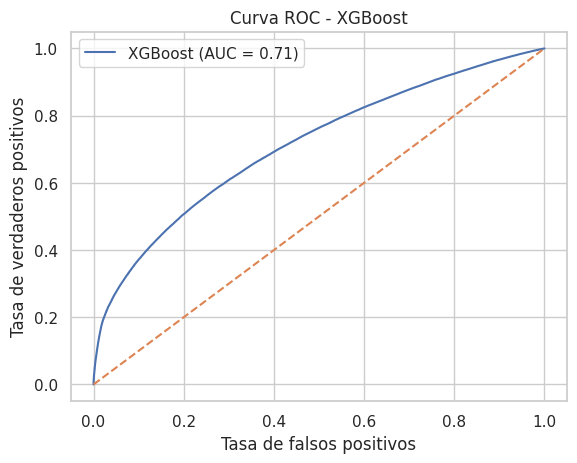

In [34]:
# Cálculo del peso de clase
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos

# Modelo base
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Mantenemos 4 combinaciones
param_grid = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.1],
    'classifier__scale_pos_weight': [scale_pos_weight],
}

# GridSearchCV
grid_search = GridSearchCV(
    xgb_pipeline,
    param_grid,
    cv=cv,
    scoring=recall,
    n_jobs=-1,
    verbose=1
)

# Entrenamiento
grid_search.fit(X_train, y_train)

print("Mejores parámetros (XGBoost):", grid_search.best_params_)
print(f"Mejor recall CV (XGBoost): {grid_search.best_score_:.4f}")

# Evaluación en test
mejor_xgb = grid_search.best_estimator_
evaluar_modelo(mejor_xgb, X_test, y_test, "XGBoost")

## 3.3. Árbol de Decisión (Decision Tree)

Recall árbol de decisión (CV): 0.5520

== Evaluación de Árbol de Decisión en test ==
              precision    recall  f1-score   support

         0.0     0.9228    0.7483    0.8264    631297
         1.0     0.2336    0.5508    0.3280     87920

    accuracy                         0.7241    719217
   macro avg     0.5782    0.6495    0.5772    719217
weighted avg     0.8386    0.7241    0.7655    719217

ROC AUC: 0.7040


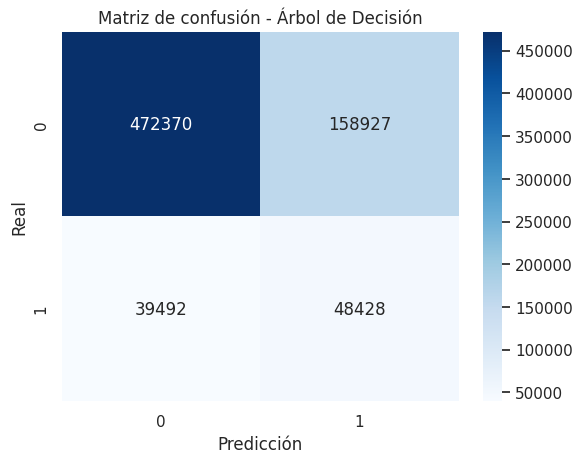

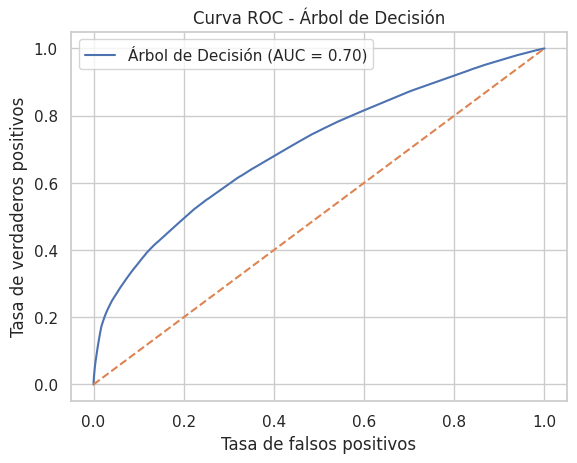

In [35]:
# Pipeline para Árbol de Decisión
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        class_weight='balanced',
        random_state=42,
        max_depth=10,
        min_samples_leaf=50
    ))
])

# Validación cruzada
dt_scores = cross_val_score(dt_pipeline, X_train, y_train, cv=cv, scoring=recall)
print(f"Recall árbol de decisión (CV): {dt_scores.mean():.4f}")

# Entrenamiento y evaluación en test
dt_pipeline.fit(X_train, y_train)
evaluar_modelo(dt_pipeline, X_test, y_test, "Árbol de Decisión")

## 3.4. Random Forest

Recall validación cruzada (Random Forest): 0.5413

== Evaluación de Random Forest en test ==
              precision    recall  f1-score   support

         0.0     0.9225    0.7578    0.8321    631297
         1.0     0.2379    0.5427    0.3308     87920

    accuracy                         0.7315    719217
   macro avg     0.5802    0.6503    0.5814    719217
weighted avg     0.8388    0.7315    0.7708    719217

ROC AUC: 0.7054


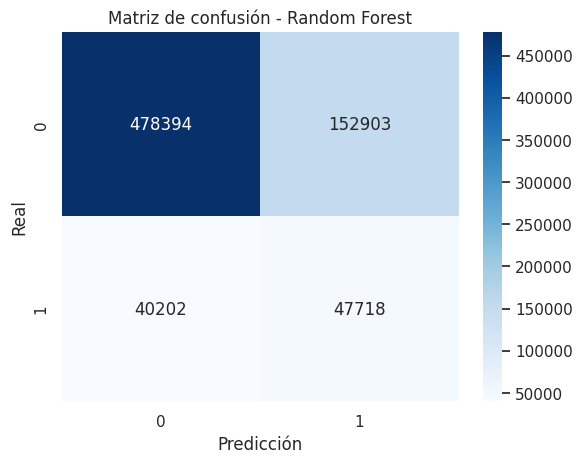

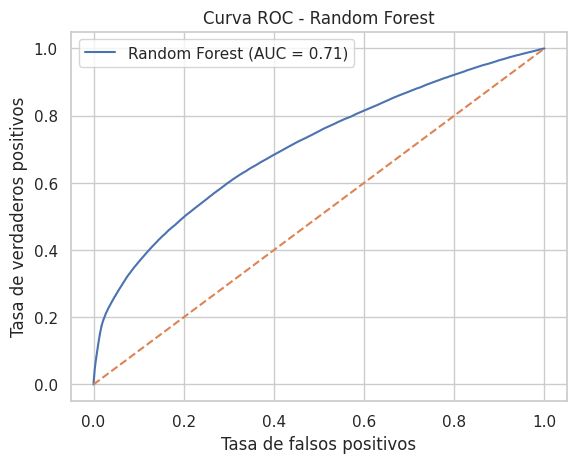

In [36]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        class_weight='balanced',
        random_state=42,
        n_estimators=25,
        max_depth=10,
        max_features='sqrt',
        n_jobs=-1
    ))
])

# Validación cruzada
rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=cv, scoring=recall)
print(f"Recall validación cruzada (Random Forest): {rf_scores.mean():.4f}")

# Entrenamiento y evaluación en test
rf_pipeline.fit(X_train, y_train)
evaluar_modelo(rf_pipeline, X_test, y_test, "Random Forest")

## 3.5. Comparación de modelos

In [37]:
print("Resumen de Recall en validación cruzada:")
print(f"- Regresión Logística: {cv_scores.mean():.4f}")
print(f"- Árbol de Decisión: {dt_scores.mean():.4f}")
print(f"- XGBoost: {grid_search.best_score_:.4f}")
print(f"- Random Forest: {rf_scores.mean():.4f}")

Resumen de Recall en validación cruzada:
- Regresión Logística: 0.5474
- Árbol de Decisión: 0.5520
- XGBoost: 0.5621
- Random Forest: 0.5413


## 3.6. Mejora de XGBoost

#### 3.6.1. Recálculo del peso de clase

In [38]:
# Recalcular el peso de clase
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos

#### 3.6.2. Definir el modelo base

In [39]:
# Se mantiene el mismo en este caso
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

#### 3.6.3. Creación del pipeline

In [40]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

#### 3.6.4. Definición de búsqueda aleatoria de hiperparámetros

In [41]:
param_dist = {
    'classifier__n_estimators': randint(50, 120),
    'classifier__max_depth': randint(3, 7),
    'classifier__learning_rate': uniform(0.05, 0.1),
    'classifier__scale_pos_weight': uniform(scale_pos_weight * 0.9, scale_pos_weight * 0.2)
}

#### 3.6.5. Ejecución eficiente de la búsqueda aleatoria

In [42]:
random_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring=recall,  # Manteniene recall como métrica principal
    n_jobs=-1,
    verbose=1,
    random_state=42
)

#### 3.6.6. Entrenar modelo

In [43]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Interval_Last_Pregnancy',
                                                                                'Smoking_Before_Pregnancy']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encoder',
                                                                                                OneHotEncode...
                                        'classifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c5d64128ed0>,
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c5d6411f4d0>,
                                        'classifier__scale_pos_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c5d69dab610>},
                   random_state=42,
                   scoring=make_scorer(recall_score, response_method='predict'),
                   verbose=1)

#### 3.6.7. Resultados

Mejores parámetros (XGBoost): {'classifier__learning_rate': np.float64(0.10142344384136116), 'classifier__max_depth': 6, 'classifier__n_estimators': 52, 'classifier__scale_pos_weight': np.float64(7.697223197183839)}
Mejor recall CV (XGBoost): 0.5867

== Evaluación de XGBoost Optimizado en test ==
              precision    recall  f1-score   support

         0.0     0.9259    0.7210    0.8107    631297
         1.0     0.2263    0.5859    0.3265     87920

    accuracy                         0.7045    719217
   macro avg     0.5761    0.6534    0.5686    719217
weighted avg     0.8404    0.7045    0.7515    719217

ROC AUC: 0.7105


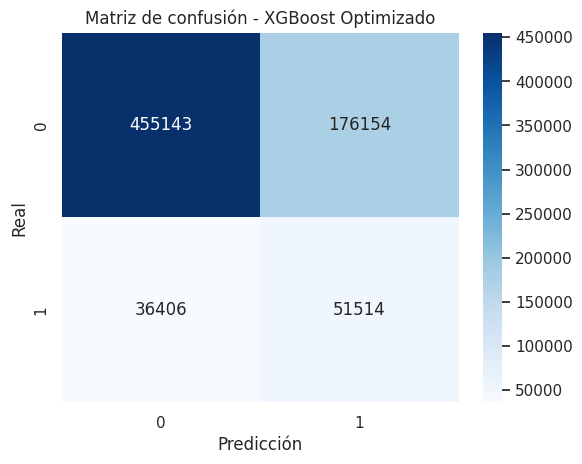

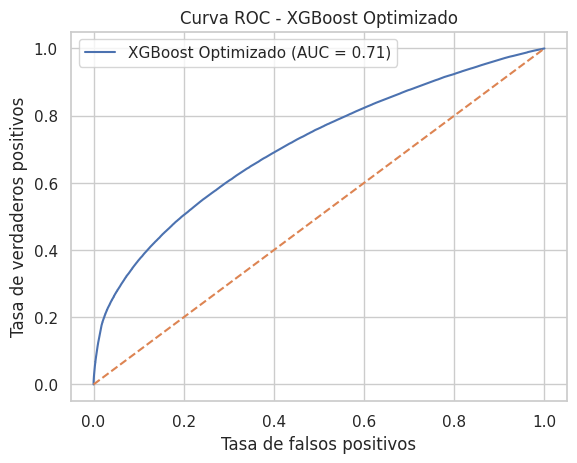

In [44]:
# Mostrar mejores hiperparámetros
print("Mejores parámetros (XGBoost):", random_search.best_params_)
print(f"Mejor recall CV (XGBoost): {random_search.best_score_:.4f}")

# Evaluar el modelo final sobre el conjunto de test
mejor_xgb = random_search.best_estimator_
evaluar_modelo(mejor_xgb, X_test, y_test, "XGBoost Optimizado")

#### 3.6.8. Guardado del modelo

In [45]:
joblib.dump(mejor_xgb, 'mejor_modelo_xgboost.pkl')

['mejor_modelo_xgboost.pkl']